Original Image


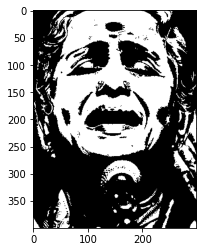

Answers for question 3.1
Bit Error Rate: 0.21104166666666666
Image constructed from decoded bits


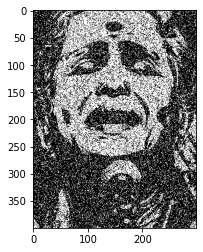





Answers for question 3.2
Bit Error Rate: 0.26681666666666665
Image constructed from decoded bits


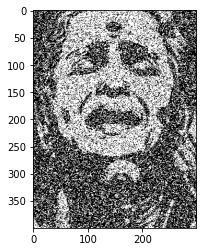

In [35]:
import numpy as np
from matplotlib import pyplot as plt

mss = np.load('mss.npy')
print("Original Image")
plt.imshow(mss,'gray')
plt.show()

#Channel parameters
x0 = [0.2718549983,0.7281450017]
x1 = [0.6653328103,0.3346671897]

#Converting mss to a string
Mss_str = ''
for i in range(np.shape(mss)[0]):
    for j in range(np.shape(mss)[1]):
        Mss_str += str(mss[i][j])
        
#########################  encoding and Decoding for 3.1 ###############      
mss_enc1 = ''
for i in range(len(Mss_str)):
    if(Mss_str[i] == '0'):
        mss_enc1 += '000'
    if(Mss_str[i] == '1'):
        mss_enc1 += '111'
Y1 = ''
for i in range(len(mss_enc1)):
    if(mss_enc1[i] == '0'):
        t1 = np.random.uniform(0,1)
        if(t1 < x0[0]):
            Y1 += '0'
        else:
            Y1 += '1'
    if(mss_enc1[i] == '1'):
        t1 = np.random.uniform(0,1)
        if(t1 < x1[0]):
            Y1 += '0'
        else:
            Y1 += '1'
X1 = ''
for i in range(int(len(Y1)/3)):
    start = i*3
    end = (i+1)*3
    t1 = t2 = 1
    for j in Y1[start:end]:
        if(j == '0'):
            t1 = t1*x0[0]
            t2 = t2*x1[0]
        if(j == '1'):
            t1 = t1*x0[1]
            t2 = t2*x1[1]
    if(t1 > t2):
        X1 += '0'
    else:
        X1 += '1'


#Converting string back to an array
X1_l = len(X1)
X1_arr = np.zeros(X1_l)
for i in range(X1_l):
    X1_arr[i] = int(X1[i])
#########################  encoding and Decoding for 3.2 ###############   
mss_enc2 = ''
for i in range(int(len(Mss_str)/2)):
    start = i*2
    end = (i+1)*2
    if(Mss_str[start:end] == '00'):
        mss_enc2 += '00000'
    if(Mss_str[start:end] == '01'):
        mss_enc2 += '00111'
    if(Mss_str[start:end] == '10'):
        mss_enc2 += '11100'
    if(Mss_str[start:end] == '11'):
        mss_enc2 += '11011'

Y2 = ''
for i in range(len(mss_enc2)):
    if(mss_enc2[i] == '0'):
        t1 = np.random.uniform(0,1)
        if(t1 < x0[0]):
            Y2 += '0'
        else:
            Y2 += '1'
    if(mss_enc2[i] == '1'):
        t1 = np.random.uniform(0,1)
        if(t1 < x1[0]):
            Y2 += '0'
        else:
            Y2 += '1'
X2 = ''
for k in range(int(len(Y2)/5)):
    start = k*5
    end = (k+1)*5
    cw = ['00000','00111','11100','11011']
    m = None
    ind = 0
    for j in cw:
        ind +=1
        t = 1
        for i in range(len(Y2[start:end])):
            k1 = j[i]
            i = Y2[start:end][i]
            if(k1 == '0'):
                if(i == '0'):
                    t = t*x0[0]
                if(i == '1'):
                    t = t*x0[1]
            if(k1 == '1'):
                if(i == '0'):
                    t = t*x1[0]
                if(i == '1'):
                    t = t*x1[1]
        if(m == None or t > m):
            m = t
            b = ind
    if(b == 1):
        X2 += '00'
    if(b == 2):
        X2 += '01'
    if(b == 3):
        X2 += '10'
    if(b == 4):
        X2 += '11'
X2_l = len(X2)    
X2_arr = np.zeros(X2_l)
for i in range(X2_l):
    X2_arr[i] = int(X2[i])

    
######bit error rate and Constructed Image for 3.1######
X1_arr = X1_arr.reshape(400,300)
bit_error_rate1 = np.sum(np.abs(X1_arr-mss))/(300*400)
print('Answers for question 3.1')
print("Bit Error Rate:" ,bit_error_rate1)
print("Image constructed from decoded bits")
plt.imshow(X1_arr,'gray')
plt.show()

print("")
print("")
print("")
print("")
######bit error rate and Constructed Image for 3.2######
X2_arr = X2_arr.reshape(400,300)
bit_error_rate2 = np.sum(np.abs(X2_arr-mss))/(300*400)
print('Answers for question 3.2')
print("Bit Error Rate:" ,bit_error_rate2)
print("Image constructed from decoded bits")
plt.imshow(X2_arr,'gray')
plt.show()
